In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://www.worldometers.info/world-population/'

pagina = requests.get(url)

soup = BeautifulSoup(pagina.text, 'lxml')

tabela = soup.find('table', class_='table table-striped table-bordered table-hover table-condensed table-list')

titulos = tabela.find_all('th')

In [8]:
titulos_text_list = []
for t in titulos:
    titulos_text_list.append(t.text)
    

In [10]:
df = pd.DataFrame(columns=titulos_text_list)

In [13]:
linhastabela = tabela.find_all('tr')

In [45]:
for lt in linhastabela[1:]:
    dados_da_linha = lt.find_all('td')
    linhadedados=[]
    for ddl in dados_da_linha[:]:
        linhadedados.append(ddl.text)
    df.loc[len(df)]=linhadedados
        
        

In [46]:
df


,Year (July 1),Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population
0,2020,"7,794,798,739",1.05 %,"81,330,639",30.9,2.47,52,56.2 %,"4,378,993,944"
1,2019,"7,713,468,100",1.08 %,"82,377,060",29.8,2.51,52,55.7 %,"4,299,438,618"
2,2018,"7,631,091,040",1.10 %,"83,232,115",29.8,2.51,51,55.3 %,"4,219,817,318"
3,2017,"7,547,858,925",1.12 %,"83,836,876",29.8,2.51,51,54.9 %,"4,140,188,594"
4,2016,"7,464,022,049",1.14 %,"84,224,910",29.8,2.51,50,54.4 %,"4,060,652,683"
5,2015,"7,379,797,139",1.19 %,"84,594,707",30,2.52,50,54.0 %,"3,981,497,663"
6,2010,"6,956,823,603",1.24 %,"82,983,315",28,2.58,47,51.7 %,"3,594,868,146"
7,2005,"6,541,907,027",1.26 %,"79,682,641",27,2.65,44,49.2 %,"3,215,905,863"
8,2000,"6,143,493,823",1.35 %,"79,856,169",26,2.78,41,46.7 %,"2,868,307,513"
9,1995,"5,744,212,979",1.52 %,"83,396,384",25,3.01,39,44.8 %,"2,575,505,235"


In [47]:
import matplotlib as mpl
from matplotlib import pyplot as plt

In [53]:
df.columns= ['YearJuly1', 'Population', 'Yearly%Change', 'YearlyChange',
       'MedianAge', 'FertilityRate', 'DensityPKm²', 'UrbanPop%',
       'UrbanPopulation']

In [57]:
df.sort_values(by='YearJuly1', inplace=True)

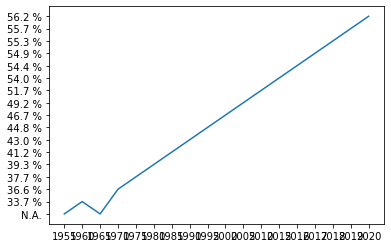

In [59]:
plt.plot(df['YearJuly1'],df['UrbanPop%'])